In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("./data/final/final-preprocessed.csv", sep=';')
df

,date,PM10,PM25,NO2,SO2,NO,NOX,O3,temp,wind_speed,hum,press,wind_dir_cat,weather_event_cat,atmo_cat,atmo_mean_previous_3h,atmo_target_1h,atmo_cat_h-1,atmo_cat_h-2,atmo_cat_h-3
0,2019-01-01 04:00:00,10.2,12.5,25.4,2.6,1.0,27.0,36.6,7.9,3.7,82.0,1035.4,9,1,2,1.666667,1,2,2,1
1,2019-01-01 05:00:00,11.1,6.9,18.2,3.1,0.6,19.2,48.9,8.0,3.7,81.0,1034.8,2,1,1,2.000000,1,2,2,2
2,2019-01-01 06:00:00,10.7,6.1,26.3,3.2,1.6,28.8,34.8,8.3,3.7,80.0,1034.9,9,1,1,1.666667,2,1,2,2
3,2019-01-01 07:00:00,15.6,10.4,31.2,3.0,2.7,35.3,36.3,8.4,3.7,79.0,1035.0,9,1,2,1.333333,2,1,1,2
4,2019-01-01 08:00:00,18.2,11.8,25.1,3.1,2.8,29.4,39.8,8.5,5.6,79.0,1035.0,13,1,2,1.333333,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,2021-12-30 16:00:00,9.6,6.7,25.6,0.8,2.8,30.0,26.0,13.7,13.0,87.0,1022.0,1,3,1,1.000000,1,1,1,1
25596,2021-12-30 17:00:00,11.4,8.1,23.9,0.9,1.5,26.2,25.2,13.9,14.8,87.0,1022.3,1,3,1,1.000000,1,1,1,1
25597,2021-12-30 18:00:00,10.8,7.5,27.7,0.6,2.3,31.2,20.9,14.0,14.8,87.0,1022.7,3,3,1,1.000000,1,1,1,1
25598,2021-12-30 19:00:00,11.9,8.4,25.8,0.6,1.1,27.6,21.2,13.4,13.0,88.0,1022.8,3,3,1,1.000000,1,1,1,1


# Training

In [5]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' feature importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [6]:
y = df["atmo_target_1h"]
X = df.drop(["date", "atmo_target_1h"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [6, 12, 24],
    "criterion": ["entropy", "gini"],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 2, 4, 6]
}
 
rf = RandomForestClassifier()

gcv = GridSearchCV(
    estimator=rf,
    param_grid=param_grid
)

In [ ]:
gcv.fit(X_train, y_train)

In [125]:
best_params = gcv.best_params_
best_params

In [8]:
# criterion='entropy', max_depth=24, min_samples_split=8, n_estimators=200
custom_params = {"criterion": "entropy", "max_depth": 24, "min_samples_split": 12, "n_estimators": 400}
rf = RandomForestClassifier(**custom_params)

In [9]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_split=12,
                       n_estimators=400)

In [10]:
y_pred = rf.predict(X_test)

In [11]:
acc = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='macro')

print(f"acc = {acc}\nf1  = {f1}")

acc = 0.769140625
f1  = 0.5921970145816146


<AxesSubplot:>

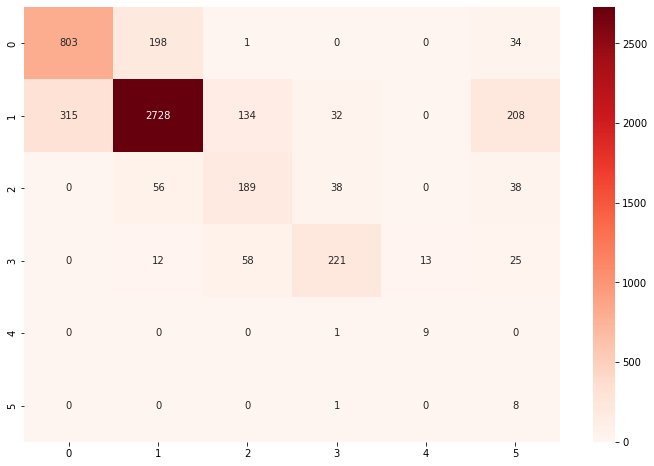

In [135]:
f = plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_mat, cmap="Reds", annot=True, fmt="g")
plt.show()

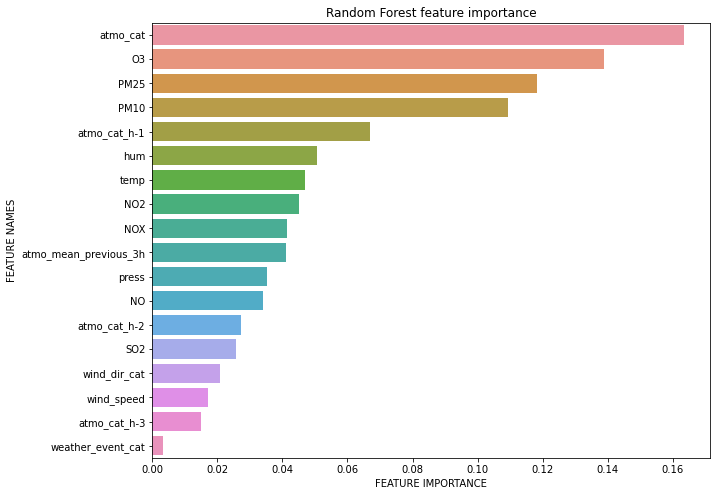

In [12]:
plot_feature_importance(rf.feature_importances_, X_train.columns, "Random Forest")